In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/undersampled_data.csv')

In [ ]:
data

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,OH,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,CA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,TX,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,MI,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,NY,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,$193.24,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,51694.676895,5921.0,Yes
1740,1999.0,3.0,2020.0,1.0,26.0,$221.96,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.000000,5300.0,Yes
1741,1999.0,3.0,2020.0,1.0,26.0,$26.69,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.000000,5300.0,Yes
1742,1999.0,3.0,2020.0,1.0,26.0,$103.95,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,MO,63146.000000,5812.0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           1744 non-null   float64
 1   Card           1744 non-null   float64
 2   Year           1744 non-null   float64
 3   Month          1744 non-null   float64
 4   Day            1744 non-null   float64
 5   Amount         1744 non-null   object 
 6   UseChip        1744 non-null   object 
 7   MerchantName   1744 non-null   object 
 8   MerchantCity   1744 non-null   object 
 9   MerchantState  1744 non-null   object 
 10  Zip            1744 non-null   float64
 11  MCC            1744 non-null   float64
 12  target         1744 non-null   object 
dtypes: float64(7), object(6)
memory usage: 177.2+ KB


In [ ]:
data.describe()

,User,Card,Year,Month,Day,Zip,MCC
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,1031.327408,1.639908,2012.118119,6.318807,16.022362,52227.300720,5480.039564
std,573.230246,1.604973,4.900833,3.552148,8.643581,22009.391840,833.166602
min,2.000000,0.000000,1991.000000,1.000000,1.000000,1266.000000,1711.000000
25%,544.000000,0.000000,2009.000000,3.000000,9.000000,45822.000000,5300.000000
50%,1058.000000,1.000000,2012.000000,6.000000,16.000000,51694.676895,5411.000000
75%,1514.000000,3.000000,2016.000000,9.000000,24.000000,55402.500000,5812.000000
max,1999.000000,8.000000,2020.000000,12.000000,31.000000,99508.000000,9402.000000


In [ ]:
data.isnull().sum()

User             0
Card             0
Year             0
Month            0
Day              0
Amount           0
UseChip          0
MerchantName     0
MerchantCity     0
MerchantState    0
Zip              0
MCC              0
target           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           1744 non-null   float64
 1   Card           1744 non-null   float64
 2   Year           1744 non-null   float64
 3   Month          1744 non-null   float64
 4   Day            1744 non-null   float64
 5   Amount         1744 non-null   object 
 6   UseChip        1744 non-null   object 
 7   MerchantName   1744 non-null   object 
 8   MerchantCity   1744 non-null   object 
 9   MerchantState  1744 non-null   object 
 10  Zip            1744 non-null   float64
 11  MCC            1744 non-null   float64
 12  target         1744 non-null   object 
dtypes: float64(7), object(6)
memory usage: 177.2+ KB


<ipython-input-183-b2ebc6db8362>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,vmax=1,center=0,annot=True)


<Axes: >

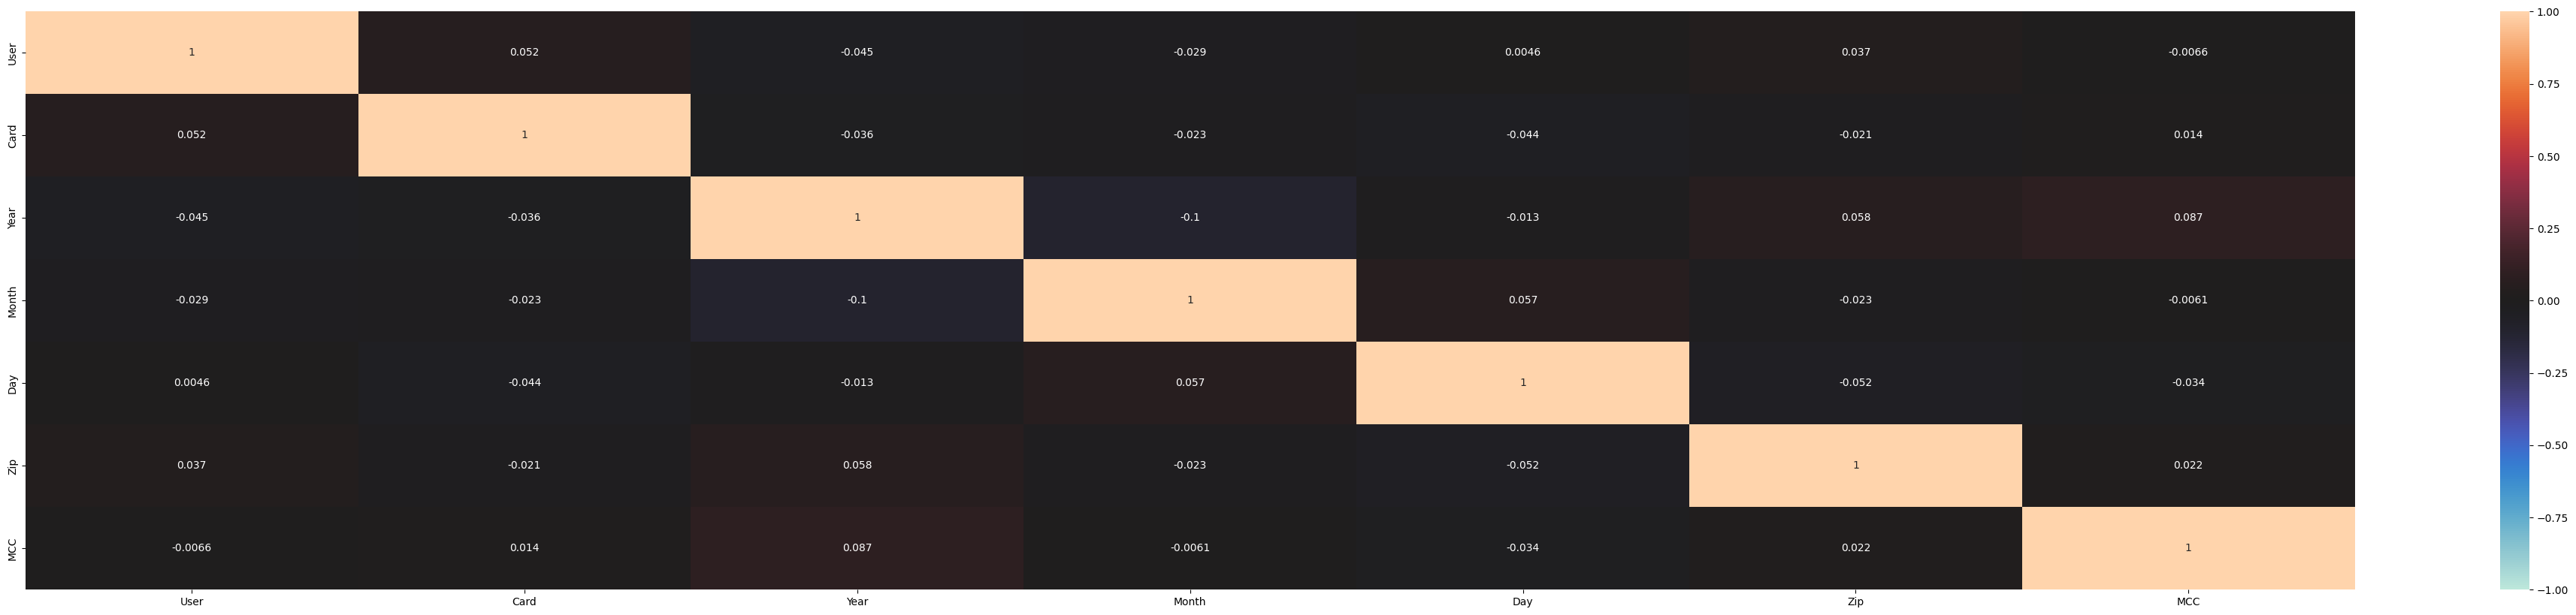

In [ ]:
plt.figure(figsize=(50,10))
sns.heatmap(data.corr(),vmin=-1,vmax=1,center=0,annot=True)

In [ ]:
data['Amount'].value_counts()

$60.00     8
$80.00     8
$100.00    7
$140.00    4
$1.71      3
          ..
$73.70     1
$8.52      1
$11.25     1
$3.81      1
$0.24      1
Name: Amount, Length: 1592, dtype: int64

In [ ]:
def quanQual(df):
  quan =[]
  qual=[]

  for column in df.columns:
    if (df[column].dtypes=='O'):
      qual.append(column)
    else:
      quan.append(column)

  return quan,qual


In [ ]:
quan , qual = quanQual(data)

In [ ]:
quan

['User', 'Card', 'Year', 'Month', 'Day', 'Zip', 'MCC']

In [ ]:
qual

['Amount',
 'UseChip',
 'MerchantName',
 'MerchantCity',
 'MerchantState',
 'target']

In [ ]:
data['Amount'] = data['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
data

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,21.42,Swipe Transaction,Lukass Theaters,Tiffin,OH,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,76.99,Chip Transaction,Jadens Wholesale,Lancaster,CA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,2.19,Swipe Transaction,Supermarket Chain 3,Houston,TX,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,45.73,Chip Transaction,Supermarket Chain 3,Flint,MI,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,NY,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,193.24,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,51694.676895,5921.0,Yes
1740,1999.0,3.0,2020.0,1.0,26.0,221.96,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.000000,5300.0,Yes
1741,1999.0,3.0,2020.0,1.0,26.0,26.69,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.000000,5300.0,Yes
1742,1999.0,3.0,2020.0,1.0,26.0,103.95,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,MO,63146.000000,5812.0,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [ ]:
col=['UseChip',
 'MerchantName',
 'MerchantCity',
 'MerchantState',
 'target']

In [ ]:
for i in col:
  data[i] = le.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           1744 non-null   float64
 1   Card           1744 non-null   float64
 2   Year           1744 non-null   float64
 3   Month          1744 non-null   float64
 4   Day            1744 non-null   float64
 5   Amount         1744 non-null   float64
 6   UseChip        1744 non-null   int64  
 7   MerchantName   1744 non-null   int64  
 8   MerchantCity   1744 non-null   int64  
 9   MerchantState  1744 non-null   int64  
 10  Zip            1744 non-null   float64
 11  MCC            1744 non-null   float64
 12  target         1744 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 177.2 KB


<Axes: >

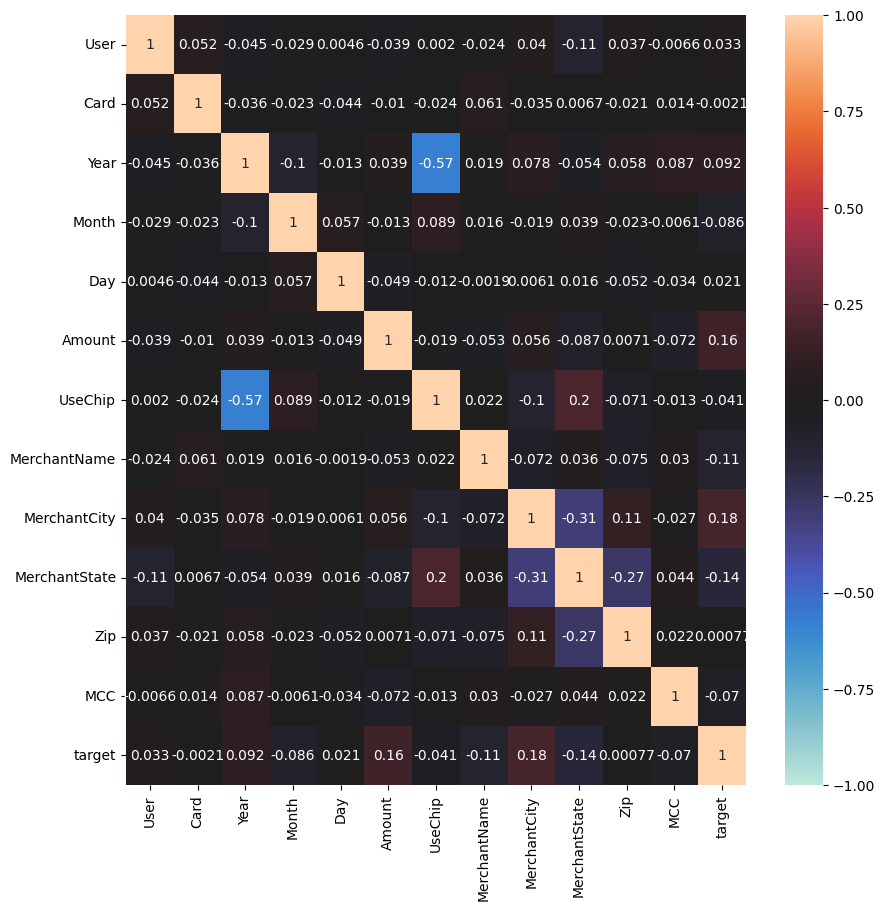

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmin=-1, vmax=1,center=0,annot=True)

In [ ]:
cor=data.corr()

cor_target=abs(cor["target"])

relevant_features=cor_target[cor_target>0.06]
print(relevant_features)

Year             0.091520
Month            0.086224
Amount           0.162054
MerchantName     0.107166
MerchantCity     0.184879
MerchantState    0.144218
MCC              0.070231
target           1.000000
Name: target, dtype: float64


In [ ]:
independent = data.loc[:,['Year','Month','UseChip','Amount','MerchantName', 'MerchantCity','MerchantState','MCC' ]  ]

In [ ]:
independent

,Year,Month,UseChip,Amount,MerchantName,MerchantCity,MerchantState,MCC
0,2015.0,7.0,2,21.42,383,522,45,7832.0
1,2016.0,5.0,0,76.99,318,270,6,5300.0
2,2012.0,11.0,2,2.19,529,230,55,5411.0
3,2019.0,5.0,0,45.73,529,171,31,5411.0
4,2018.0,1.0,0,1.25,153,68,44,5499.0
...,...,...,...,...,...,...,...,...
1739,2013.0,1.0,2,193.24,422,520,18,5921.0
1740,2020.0,1.0,2,221.96,10,471,33,5300.0
1741,2020.0,1.0,2,26.69,10,471,33,5300.0
1742,2020.0,1.0,0,103.95,160,471,33,5812.0


In [ ]:
dependent = data.iloc[:,-1]

In [ ]:
dependent

0       0
1       0
2       0
3       0
4       0
       ..
1739    1
1740    1
1741    1
1742    1
1743    1
Name: target, Length: 1744, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=1/3,random_state=50)

In [ ]:
def check(cm):
  for i in range(1 ,10):
    if cm < 10:
      return X_train,X_test,Y_train,Y_test
    else:
      X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=1/3,random_state=i*10)


In [ ]:
def mod():
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import confusion_matrix

  classifier=RandomForestClassifier(n_estimators= 100, criterion="entropy")
  classifier=classifier.fit(X_train,Y_train.values.ravel())
  y_pred=classifier.predict(X_test)
  cm=confusion_matrix(Y_test.values.ravel(),y_pred)
  val = cm[0][1]+cm[1][0]
  check(val)


In [ ]:
from sklearn.metrics import classification_report
clf_report=classification_report(Y_test.values.ravel(),y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       297
           1       0.93      0.93      0.93       285

    accuracy                           0.93       582
   macro avg       0.93      0.93      0.93       582
weighted avg       0.93      0.93      0.93       582



In [ ]:
Year=int(input())
Month=int(input())
UseChip=int(input())
Amount=int(input())
MerchantName=int(input())
MerchantCity=int(input())
MerchantState=int(input())
mcc=int(input())

In [ ]:
future_prediction=classifier.predict([[Year,Month,UseChip,Amount,MerchantName,MerchantCity,MerchantState,mcc]])
future_prediction